In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics as st

#loading in the .csv into a dataframe for viewing and cleaning
columns = ['sex', 'age', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']
try:
    student = pd.read_csv('student-mat.csv', usecols = columns)
except pd.io.common.CParserError:
    print("Your data contained rows that could not be parsed.")
student.head()

,sex,age,goout,Dalc,Walc,health,absences,G3
0,F,18,4,1,1,3,6,6
1,F,17,3,1,1,3,4,6
2,F,15,2,2,3,3,10,10
3,F,15,2,1,1,5,2,15
4,F,16,2,1,2,5,4,10


In [2]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sex       395 non-null    object
 1   age       395 non-null    int64 
 2   goout     395 non-null    int64 
 3   Dalc      395 non-null    int64 
 4   Walc      395 non-null    int64 
 5   health    395 non-null    int64 
 6   absences  395 non-null    int64 
 7   G3        395 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 24.8+ KB


In [3]:
student.describe()

,age,goout,Dalc,Walc,health,absences,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,3.108861,1.481013,2.291139,3.554430,5.708861,10.415190
std,1.276043,1.113278,0.890741,1.287897,1.390303,8.003096,4.581443
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000
50%,17.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,18.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,22.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [4]:
student.columns

Index(['sex', 'age', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3'], dtype='object')

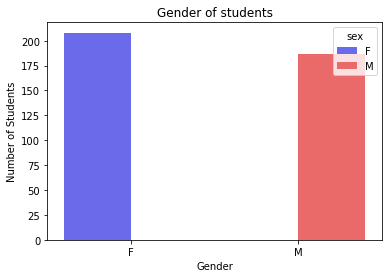

In [5]:
# Plot a count of males and females from the dataset
sns.countplot(x='sex', data=student, hue='sex', palette="seismic")
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.title("Gender of students")
plt.show()

In [6]:
print(student['sex'].value_counts())

F    208
M    187
Name: sex, dtype: int64


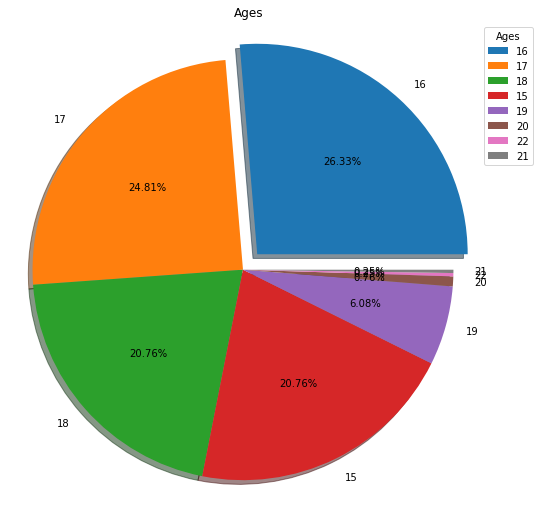

In [7]:
# Plot a pie chart of the age distibution
ages = student['age'].value_counts()
labels = np.array(ages.index)
sizes = np.array(ages / ages.sum()*100)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow = True)
plt.tight_layout()
plt.axis('equal')
plt.legend(loc="upper right", title="Ages", bbox_to_anchor=(0.1, .9, 1, 0.1))
plt.title("Ages")
plt.show()

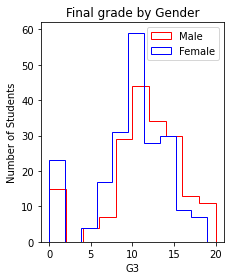

In [8]:
# Plot a general view of grades based on gender
plt.subplot(1, 2, 1)
plt.hist(student.loc[(student.sex == 'M'), "G3"], color='red', histtype = 'step', label='Male')
plt.hist(student.loc[(student.sex == 'F'), "G3"], color='blue', histtype = 'step', label='Female')
plt.title('Final grade by Gender')
plt.xlabel('G3')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.legend()
plt.show()

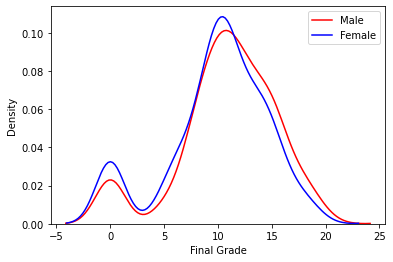

In [9]:
# Similar to previous plot but as a distribution of grades for males and females
labels=["Male", "Female"]
plt1 = sns.distplot(student[(student.sex == 'M')]["G3"], color='red', hist=False, bins=10, label="Male")
plt2 = sns.distplot(student[(student.sex == 'F')]["G3"], color='blue', hist=False, bins=10, label="Female")
plt.xlabel('Final Grade')
plt.ylabel('Density')
plt.legend()
plt.show()

In [10]:
# Get the length of dataframe
n_data = len(student)
# Calculate average grade
average_grade = student['G3'].sum()/n_data
# Create a dataframe of the average male grade
mgrade_df = student[student['sex']=='M']['G3']
# Create a dataframe of the average female grade
fgrade_df = student[student['sex']=='F']['G3']
# Calculate the mean grade of the male dataset
mgrade_mean = np.mean(mgrade_df)
# Calculate the mean grade of the female dataset
fgrade_mean = np.mean(fgrade_df)
# Print values obtained
print("The average grade of male students is:", round(mgrade_mean,2))
print("The average grade of female students is:", round(fgrade_mean,2))
print("The average grade is:", round(average_grade,2))
print()
# Calculate the median grade of the male dataset
mgrade_med = np.median(mgrade_df)
# Calculate the median grade of the female dataset
fgrade_med = np.median(fgrade_df)
# Print values obtained
print("The median grade of male students is:", mgrade_med)
print("The median grade of female students is:", fgrade_med)

# Calculate the standard deviation of grades of the male dataset
mgrade_stdev = st.stdev(mgrade_df)
# Calculate the standard deviation of grades of the female dataset
fgrade_stdev = st.stdev(fgrade_df)
# Print values obtained
print("Standard Deviation of grades for male students:", mgrade_stdev)
print("Standard Deviation of grades for male students:", fgrade_stdev)

The average grade of male students is: 10.91
The average grade of female students is: 9.97
The average grade is: 10.42

The median grade of male students is: 11.0
The median grade of female students is: 10.0
Standard Deviation of grades for male students: 4.495296834986385
Standard Deviation of grades for male students: 4.622338337431134


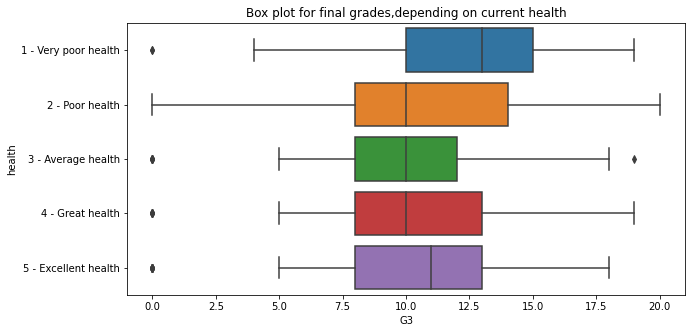

In [11]:
plt.figure(figsize=(10,5))
# Create a boxplot of health versus grade to see if healthy students score a higher grade
sns.boxplot(x="G3", y="health", orient="h", data=student)
plt.title('Box plot for final grades,depending on current health')
# Give the y-axis more meaning
plt.yticks(np.arange(5), ('1 - Very poor health','2 - Poor health','3 - Average health','4 - Great health','5 - Excellent health'))
plt.show()

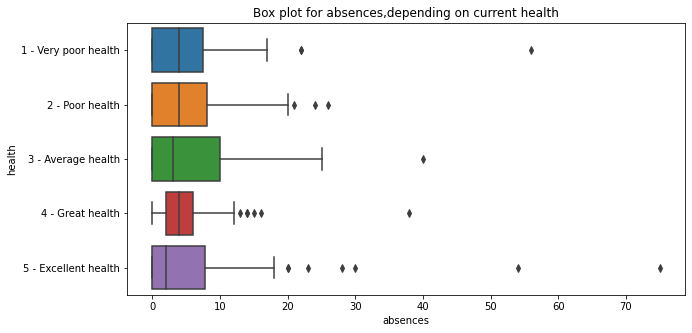

In [12]:
plt.figure(figsize=(10,5))
# Create a boxplot of health versus absences to see if healthy students score a higher grade
sns.boxplot(x="absences", y="health", orient="h", data=student)
plt.title('Box plot for absences,depending on current health')
# Give the y-axis more meaning
plt.yticks(np.arange(5), ('1 - Very poor health','2 - Poor health','3 - Average health','4 - Great health','5 - Excellent health'))
plt.show()

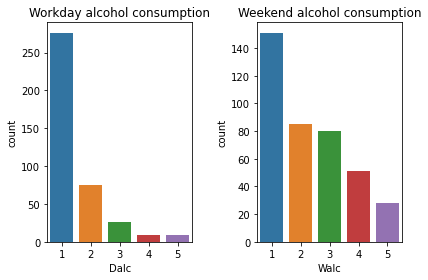

In [13]:
plt.subplot(1, 2, 1)
# Plot a count of alcohol consumption on workdays from the dataframe
sns.countplot(student['Dalc'], data=student)
plt.title('Workday alcohol consumption')
plt.subplot(1 ,2, 2)
# Plot a count of alcohol consumption on weekends from the dataframe
sns.countplot(student['Walc'], data=student)
plt.title('Weekend alcohol consumption')
plt.tight_layout()
plt.show()

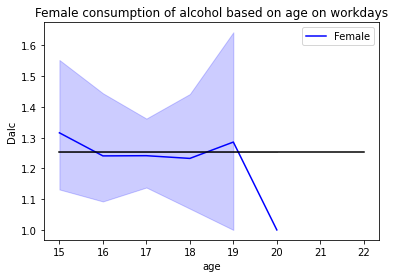

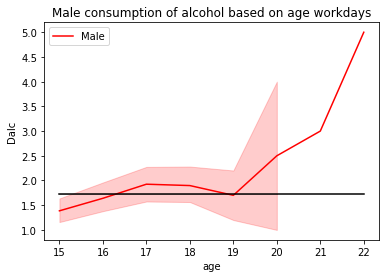

In [14]:
# Perform a lineplot of workday alcohol consumption versus age using a dataframe of female students
sns.lineplot(y='Dalc', x='age',  data=student[(student.sex == 'F')], color='b', label="Female")
# Plot on the same lineplot a line representing the mean of the female students who consume alcohol
sns.lineplot(y=np.mean(student[(student.sex == 'F')]['Dalc']), x='age', data=student, color='black')
plt.title("Female consumption of alcohol based on age on workdays")
plt.show()
# Perform a lineplot of workday alcohol consumption versus age using a dataframe of male students
sns.lineplot(y='Dalc', x='age',  data=student[(student.sex == 'M')], color='r', label="Male")
# Plot on the same lineplot a line representing the mean of the female students who consume alcohol
sns.lineplot(y=np.mean(student[(student.sex == 'M')]['Dalc']), x='age', data=student, color='black')
plt.title("Male consumption of alcohol based on age workdays")
plt.show()

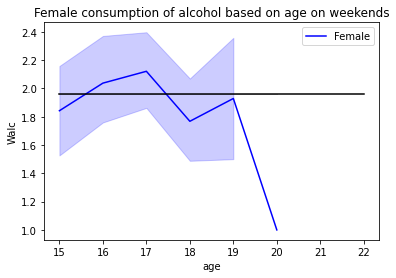

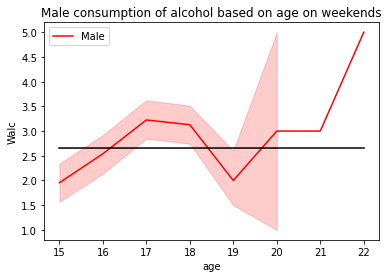

In [15]:
# Perform a lineplot of weekend alcohol consumption versus age using a dataframe of female students
sns.lineplot(y='Walc', x='age',  data=student[(student.sex == 'F')], color='b', label="Female")
# Plot on the same lineplot a line representing the mean of the female students who consume alcohol
sns.lineplot(y=np.mean(student[(student.sex == 'F')]['Walc']), x='age', data=student, color='black')
plt.title("Female consumption of alcohol based on age on weekends")
plt.show()
# Perform a lineplot of weekend alcohol consumption versus age using a dataframe of female students
sns.lineplot(y='Walc', x='age',  data=student[(student.sex == 'M')], color='r', label="Male")
# Plot on the same lineplot a line representing the mean of the female students who consume alcohol
sns.lineplot(y=np.mean(student[(student.sex == 'M')]['Walc']), x='age', data=student, color='black')
plt.title("Male consumption of alcohol based on age on weekends")
plt.show()

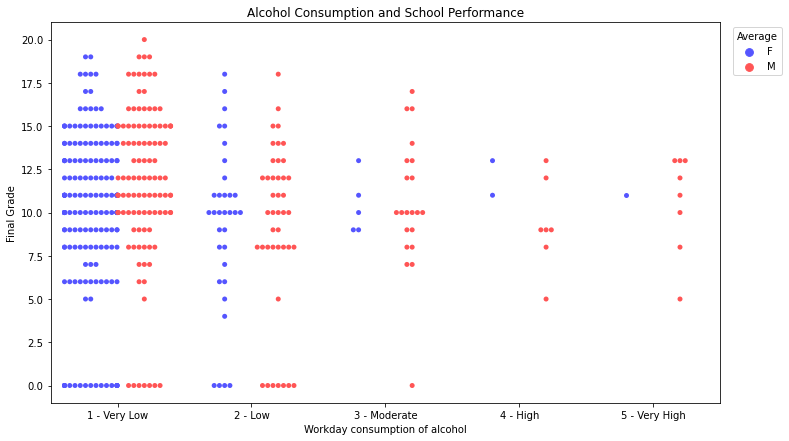

In [16]:
plt.figure(figsize=(12,7))
# Create a swarmplot where we distrivbute the grade based on the amount of alcohol they consume on the weekend
sns.swarmplot(x = 'Dalc', y = 'G3', hue = 'sex', data = student, dodge=True, palette="seismic")
plt.title('Alcohol Consumption and School Performance')
plt.xlabel('Workday consumption of alcohol')
# Give the x-axis more meaning
plt.xticks(np.arange(5), ('1 - Very Low','2 - Low','3 - Moderate','4 - High','5 - Very High'))
plt.ylabel('Final Grade')
plt.legend(loc="upper right", title="Average", bbox_to_anchor=(0.1, .9, 1, 0.1))
plt.show()

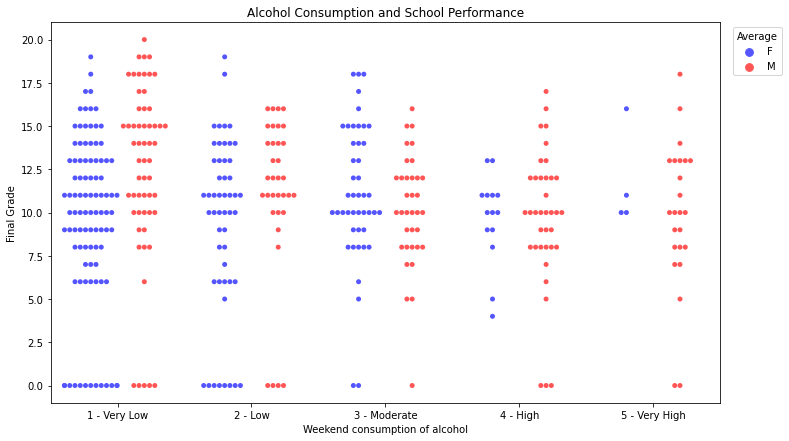

In [17]:
plt.figure(figsize=(12,7))
# Create a swarmplot where we distrivbute the grade based on the amount of alcohol they consume on the weekend
sns.swarmplot(x = 'Walc', y = 'G3', hue = 'sex', data = student, dodge=True, palette="seismic")
plt.title('Alcohol Consumption and School Performance')
plt.xlabel('Weekend consumption of alcohol')
# Give the x-axis more meaning
plt.xticks(np.arange(5), ('1 - Very Low','2 - Low','3 - Moderate','4 - High','5 - Very High'))
plt.ylabel('Final Grade')
plt.legend(loc="upper right", title="Average", bbox_to_anchor=(0.1, .9, 1, 0.1))
plt.show()

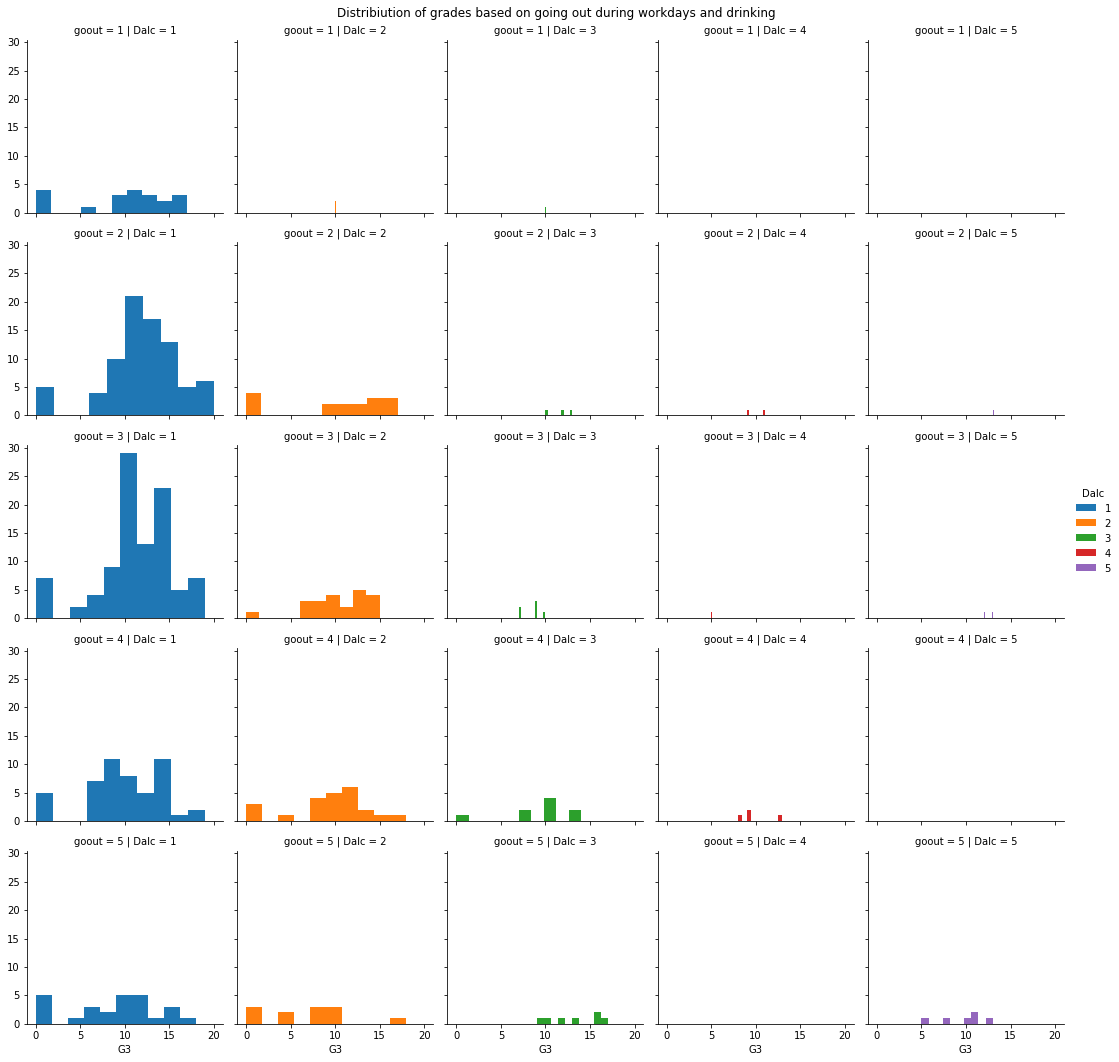

In [18]:
# Create a grid of Walc and goout using Walc as a hue using FacetGrid
grid = sns.FacetGrid(student, col="Dalc",  row="goout", hue = 'Dalc')
# Map the grid with a histogram using final grade
grid.map_dataframe(plt.hist, 'G3', bins=10).add_legend()
plt.suptitle("Distribiution of grades based on going out during workdays and drinking")
plt.subplots_adjust(top = 0.95)
plt.show()

Text(0.5, 1.0, 'Correlation between going out and workday alcohol consumption')

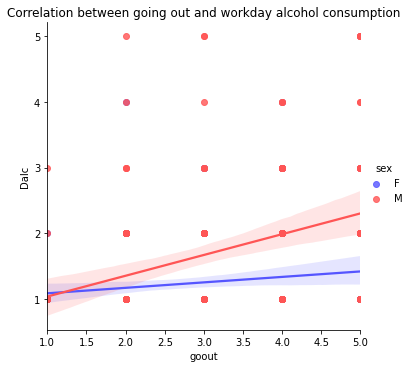

In [19]:
# Plot 'goout' and 'Dalc' using a regression model and FacetGrid
sns.lmplot(x="goout", y="Dalc",hue = 'sex',data=student, palette = 'seismic')
plt.title("Correlation between going out and workday alcohol consumption")

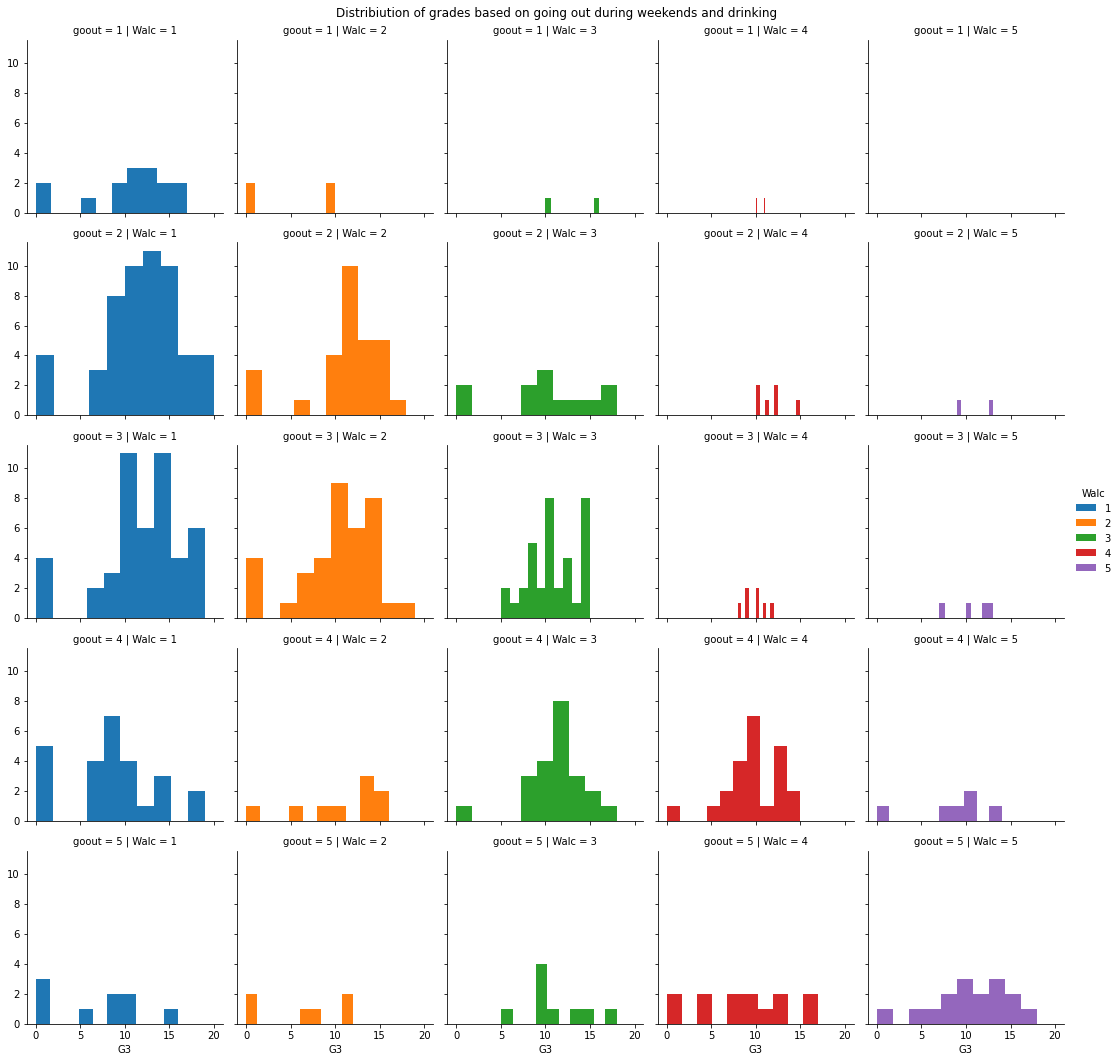

In [20]:
# Create a grid of Walc and goout using Walc as a hue using FacetGrid
grid = sns.FacetGrid(student, col="Walc",  row="goout", hue = 'Walc')
# Map the grid with a histogram using final grade
grid.map_dataframe(plt.hist, 'G3', bins=10).add_legend()
plt.suptitle("Distribiution of grades based on going out during weekends and drinking")
plt.subplots_adjust(top = 0.95)
plt.show()

Text(0.5, 1.0, 'Correlation between going out and weekend alcohol consumption')

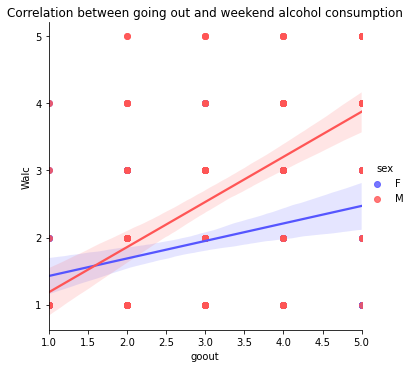

In [21]:
# Plot 'goout' and 'Walc' using a regression model and FacetGrid
sns.lmplot(x="goout", y="Walc",hue = 'sex',data=student, palette = 'seismic')
plt.title("Correlation between going out and weekend alcohol consumption")

In [22]:
# Compute Pearson correlation coefficient
corr, pval = stats.pearsonr(student['Dalc'], student['goout'])
corr = round(corr, 2)

#Print result
print("Correlation between going out and consuming alcohol on workdays is:", corr)
print("The p-value between going out and consuming alcohol on workdays is:", pval)

Correlation between going out and consuming alcohol on workdays is: 0.27
The p-value between going out and consuming alcohol on workdays is: 7.136727169466113e-08


In [23]:
#Compute a cross tabulation of two columns 'Dalc' and 'goout'
crosstab = pd.crosstab(student['Dalc'], student['goout'])
# Perform a chi-square test on the cross tabulated data
stats.chi2_contingency(crosstab)

(48.78628219209503,
 3.5714751508089954e-05,
 16,
 array([[16.07088608, 71.96962025, 90.83544304, 60.09113924, 37.03291139],
        [ 4.36708861, 19.55696203, 24.6835443 , 16.32911392, 10.06329114],
        [ 1.51392405,  6.77974684,  8.55696203,  5.66075949,  3.48860759],
        [ 0.52405063,  2.34683544,  2.96202532,  1.95949367,  1.20759494],
        [ 0.52405063,  2.34683544,  2.96202532,  1.95949367,  1.20759494]]))

In [24]:
# Compute Pearson correlation coefficient
corr, pval = stats.pearsonr(student['Walc'], student['goout'])
corr = round(corr, 2)

#Print result
print("Correlation between going out and consuming alcohol on weekends is:", corr)
print("The p-value between going out and consuming alcohol on weekends is:", pval)

Correlation between going out and consuming alcohol on weekends is: 0.42
The p-value between going out and consuming alcohol on weekends is: 2.4016155113007542e-18


In [25]:
#Compute a cross tabulation of two columns 'Walc' and 'goout'
crosstab = pd.crosstab(student['Walc'], student['goout'])
# Perform a chi-square test on the cross tabulated data
stats.chi2_contingency(crosstab)

(116.56749687179874,
 2.50352859326213e-17,
 16,
 array([[ 8.79240506, 39.37468354, 49.69620253, 32.87594937, 20.26075949],
        [ 4.94936709, 22.16455696, 27.97468354, 18.50632911, 11.40506329],
        [ 4.65822785, 20.86075949, 26.32911392, 17.41772152, 10.73417722],
        [ 2.96962025, 13.29873418, 16.78481013, 11.10379747,  6.84303797],
        [ 1.63037975,  7.30126582,  9.21518987,  6.09620253,  3.75696203]]))

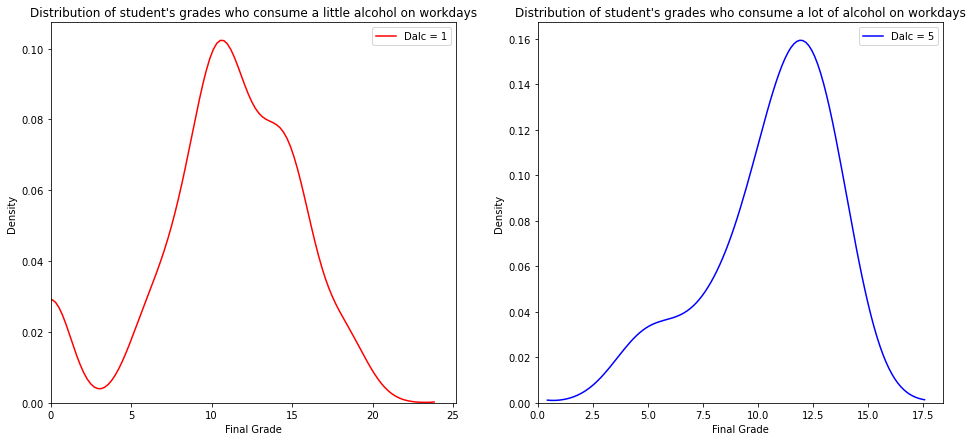

In [26]:
plt.figure(figsize=(16,7))
plt.subplot(121)
# Plot a normal distribution of grade based on workday alcohol consumption of 1
sns.kdeplot(student[(student.Dalc == 1)]["G3"], color='red', label="Dalc = 1")
plt.title('Distribution of student\'s grades who consume a little alcohol on workdays')
# Limit x-axis to 0 so we avoid data starting at -5
plt.xlim(0)
plt.xlabel('Final Grade')
plt.ylabel('Density')
plt.subplot(122)
# Plot a normal distribution of grade based on workday alcohol consumption of 5
sns.kdeplot(student[(student.Dalc == 5)]["G3"], color='blue', label="Dalc = 5")
plt.title('Distribution of student\'s grades who consume a lot of alcohol on workdays')
# Limit x-axis to 0 so we avoid data starting at -5
plt.xlim(0)
plt.xlabel('Final Grade')
plt.ylabel('Density')
plt.legend()
plt.show()

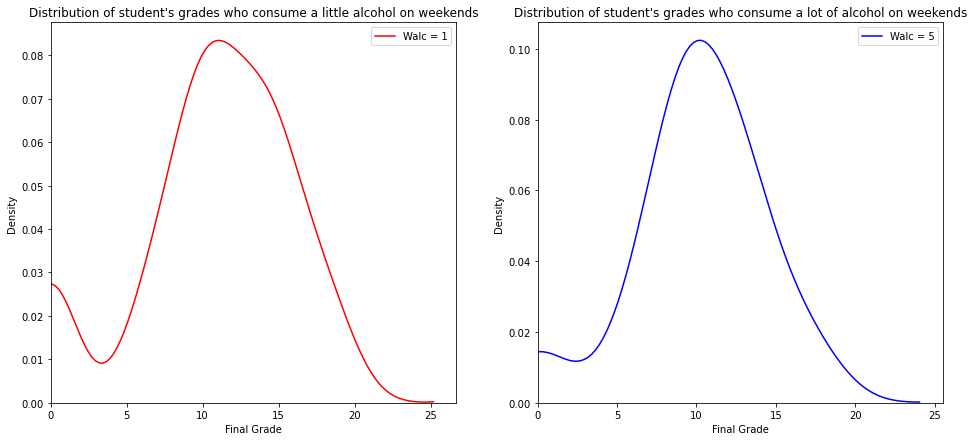

In [27]:
plt.figure(figsize=(16,7))
plt.subplot(121)
# Plot a normal distribution of grade based on weekend alcohol consumption of 1
sns.kdeplot(student[(student.Walc == 1)]["G3"], color='red', label="Walc = 1")
plt.title('Distribution of student\'s grades who consume a little alcohol on weekends')
# Limit x-axis to 0 so we avoid data starting at -5
plt.xlim(0)
plt.xlabel('Final Grade')
plt.ylabel('Density')
plt.subplot(122)
# Plot a normal distribution of grade based on weekend alcohol consumption of 5
sns.kdeplot(student[(student.Walc == 5)]["G3"], color='blue', label="Walc = 5")
plt.title('Distribution of student\'s grades who consume a lot of alcohol on weekends')
# Limit x-axis to 0 so we avoid data starting at -5
plt.xlim(0)
plt.xlabel('Final Grade')
plt.ylabel('Density')
plt.legend()
plt.show()

In [28]:
# Compute Pearson correlation coefficient
corr, pval = stats.pearsonr(student['Walc'], student['G3'])
corr = round(corr, 2)

#Print result
print("Correlation between grade and consuming alcohol on weekends is:", corr)
print("The p-value between grade and consuming alcohol on weekends is:", pval)

Correlation between grade and consuming alcohol on weekends is: -0.05
The p-value between grade and consuming alcohol on weekends is: 0.30315210798427544


In [29]:
# Compute Pearson correlation coefficient
corr, pval = stats.pearsonr(student['Dalc'], student['G3'])
corr = round(corr, 2)

#Print result
print("Correlation between grade and consuming alcohol on workdays is:", corr)
print("The p-value between grade and consuming alcohol on workdays is:", pval)

Correlation between grade and consuming alcohol on workdays is: -0.05
The p-value between grade and consuming alcohol on workdays is: 0.2784914783598845


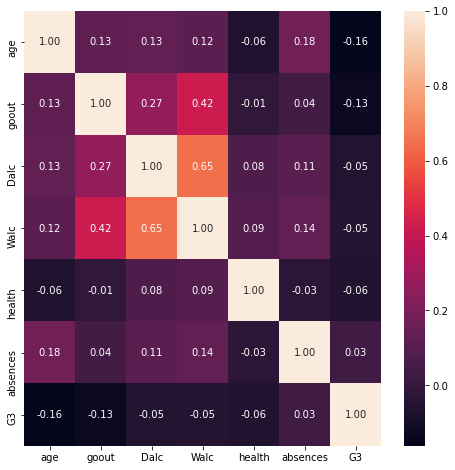

In [30]:
plt.figure(figsize=(8,8))
# Perform a heatmap of the entire dataframe to see all the correletaions between objects
sns.heatmap(student.corr(),annot = True,fmt = ".2f",cbar = True)